In [15]:
## Data Mining Assignment 2
# Includes the following;
# Feature Analysis
# Dimensionality Reduction (PCA & t-SNE)
# Visualization
# Reflection

# Wine Quality Datasets
# Author: Sheba Nkinzi

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


In [2]:
# Load red and white wine datasets
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')

# Add a column to distinguish wine type
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

# Combine datasets
df = pd.concat([red_wine, white_wine], axis=0).reset_index(drop=True)

# Display basic info
print("Combined dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

print("\nMissing values:")
print(df.isnull().sum())

Combined dataset shape: (6497, 13)

First few rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wine_type  
0 

In [3]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply IQR to all numeric columns (except 'quality' and 'wine_type')
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'quality' in numeric_cols:
    numeric_cols.remove('quality')
if 'wine_type' in numeric_cols:  # not numeric, but just in case
    numeric_cols.remove('wine_type')

# Remove outliers
for col in numeric_cols:
    df = remove_outliers_iqr(df, col)

print(f"Dataset shape after outlier removal: {df.shape}")

Dataset shape after outlier removal: (4596, 13)


In [5]:
import numpy as np

# First,we make sure the columns exist in the DataFrame
# If these columns don't exist, then we need to check our DataFrame structure
# and ensure we're using the correct column names

# Assuming the columns might have different names or don't exist yet
# Option 1: Check if columns exist first
if 'fixed_acidity' in df.columns and 'volatile_acidity' in df.columns:
    # Create new feature
    df['acidity_ratio'] = df['fixed_acidity'] / df['volatile_acidity']
    
    # Check for infinite values (if volatile_acidity was 0)
    df = df.replace([np.inf, -np.inf], np.nan).dropna()
    
    print("New feature 'acidity_ratio' created.")
else:
    print("Columns 'fixed_acidity' and/or 'volatile_acidity' don't exist in the DataFrame.")
    # You might want to print the available columns to check
    print("Available columns:", df.columns.tolist())

Columns 'fixed_acidity' and/or 'volatile_acidity' don't exist in the DataFrame.
Available columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'wine_type']


In [6]:
import numpy as np

# Create new feature using the correct column names with spaces
df['acidity_ratio'] = df['fixed acidity'] / df['volatile acidity']

# Check for infinite values (if volatile_acidity was 0)
df = df.replace([np.inf, -np.inf], np.nan).dropna()

print("New feature 'acidity_ratio' created.")

New feature 'acidity_ratio' created.


In [7]:
# Discretize quality into 3 classes
df['quality_class'] = pd.cut(
    df['quality'],
    bins=[0, 5, 7, 10],
    labels=['low', 'medium', 'high']
)

print("Quality discretized into classes:")
print(df['quality_class'].value_counts().sort_index())

Quality discretized into classes:
quality_class
low       1459
medium    2970
high       167
Name: count, dtype: int64


In [8]:
# Separate features and target
X = df.drop(['quality', 'quality_class', 'wine_type'], axis=1)  # Keep 'wine_type' for color later
y = df['quality_class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features scaled using StandardScaler.")

Features scaled using StandardScaler.


In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio (PCA):", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

Explained variance ratio (PCA): [0.25657896 0.18993571]
Total explained variance: 0.4465146705233938


In [10]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

print("t-SNE completed.")

t-SNE completed.


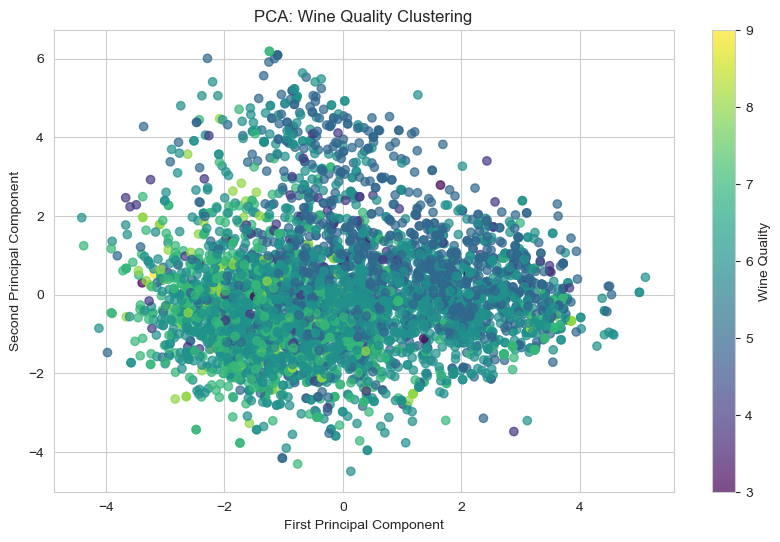

In [11]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['quality'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Wine Quality')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: Wine Quality Clustering')
plt.show()

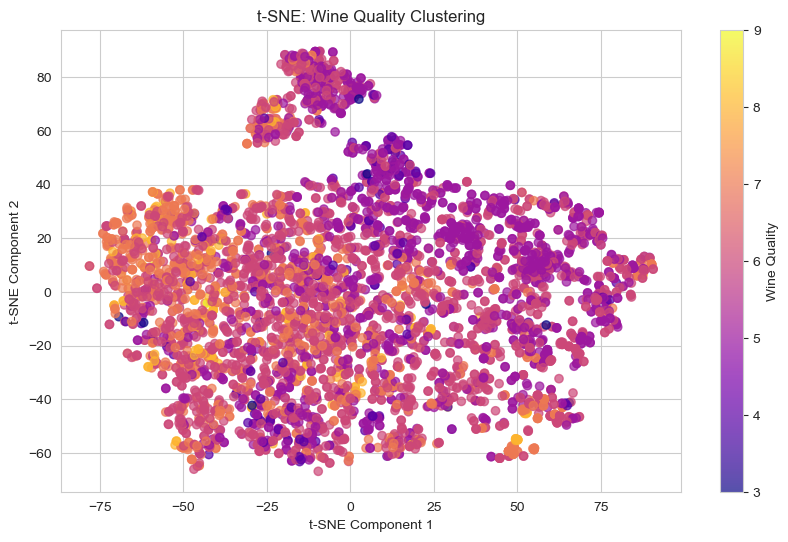

In [12]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['quality'], cmap='plasma', alpha=0.7)
plt.colorbar(scatter, label='Wine Quality')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE: Wine Quality Clustering')
plt.show()

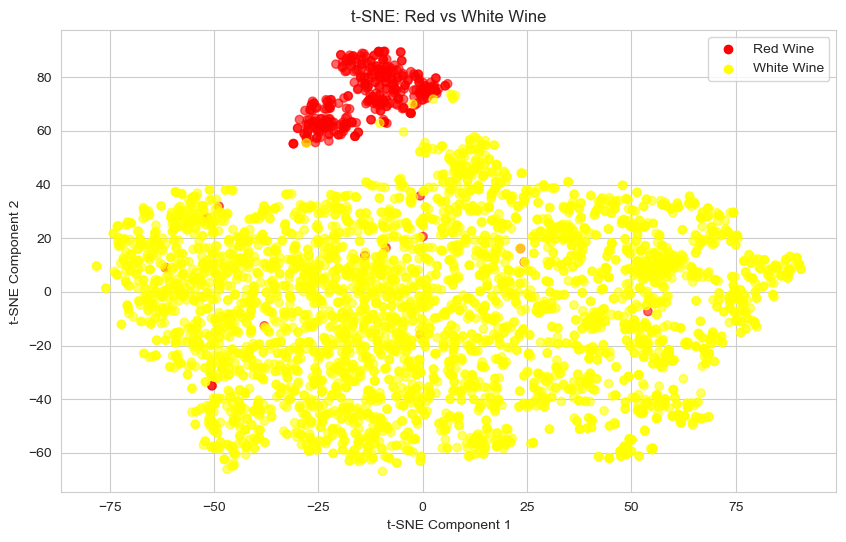

In [13]:
# Map wine type to color
color_map = {'red': 'red', 'white': 'yellow'}
colors = df['wine_type'].map(color_map)

plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors, alpha=0.6)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE: Red vs White Wine')
plt.legend(handles=[
    plt.scatter([], [], c='red', label='Red Wine'),
    plt.scatter([], [], c='yellow', label='White Wine')
])
plt.show()

# Reflection: PCA vs t-SNE

# Interpretability
- PCA(Principal Component Analysis): Linear transformation. Components are interpretable (e.g., PC1 may represent acidity + alcohol).
- t-SNE(t-Distributed Stochastic Neighbor Embedding): Non-linear, focuses on preserving local structure. Not interpretable in terms of original features.

## Accuracy & Trade-offs
- PCA preserves global structure and variance → better for downstream modeling.
- t-SNE excels at revealing clusters and patterns → better for visualization.

## Dimensionality Reduction
- Both reduce 11+ features to 2D.
- PCA is deterministic; t-SNE results vary slightly due to randomness.

## In Conclusion
We use PCA when we need explainability and modeling.
We use t-SNE when we want to explore hidden patterns or clusters.